In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
df.shape

(400, 5)

In [29]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [30]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']
x=pd.get_dummies(x)

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [33]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [34]:
y_pred = model.predict(x_test)

In [35]:
acc = metrics.accuracy_score(y_test,y_pred)
clf = metrics.classification_report(y_test,y_pred)
confmat = metrics.confusion_matrix(y_test,y_pred)

print(acc)
print(clf)

0.8625
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



<AxesSubplot:>

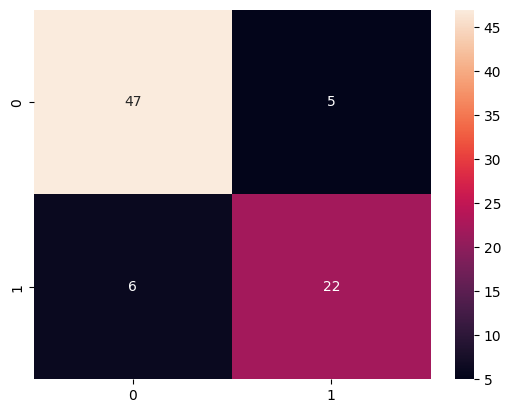

In [36]:
sns.heatmap(confmat,annot=True)

In [37]:
y_prob = model.predict_proba(x_test)[:,-1]

In [38]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_prob)
auc = metrics.auc(fpr,tpr)

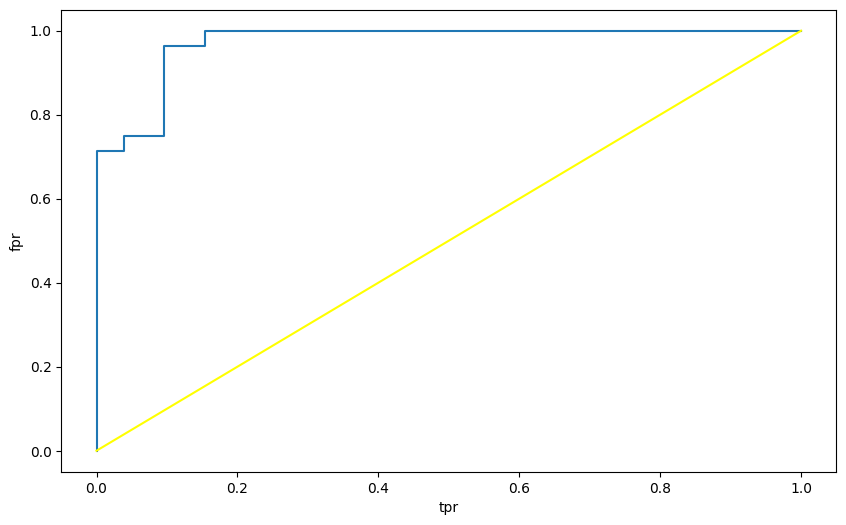

In [41]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="{auc}")
plt.plot([0,1],[0,1],color="yellow")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()